In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

In [28]:
# neural network class definition
class neuralNetwork():

    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        #初始化权重矩阵，wih和who
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w21 w22 etc
        # self.wih = (np.random.rand(self.hnodes, self.inodes) - 0.5)
        # self.who = (np.random.rand(self.onodes, self.hnodes) - 0.5)
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))        

        # learning rate
        self.lr = learningrate

        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin = 2).T
        targets = np.array(targets_list, ndmin = 2).T

        # calculate signals in hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals in final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)





        # output layer error is the (target - actual)
        output_errors = targets - final_outputs

        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors)

        # update the weights for the links between the hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))

        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))

        

    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T

        # calculate signals in hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals in final output layer   
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

In [38]:
inputnodes = 784
hiddennodes = 200
outputnodes = 10
learning_rate = 0.2

n = neuralNetwork(inputnodes, hiddennodes, outputnodes, learning_rate)

In [30]:
training_data = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data.readlines()
training_data.close()

In [39]:
#train the neural network
epochs = 4

for i in range(1, epochs + 1):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (np.asarray([float(x) for x in all_values[1:]]) / 255.0 * 0.99) + 0.01
        # plt.imshow(inputs, cmap = 'Greys', interpolation = 'None')

        targets = np.zeros(outputnodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)


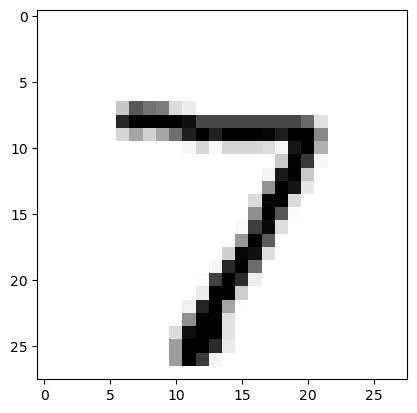

In [32]:
#test the neural network
test_data = open("mnist_dataset/mnist_test_10.csv", "r")
test_data_list = test_data.readlines()
test_data.close()

all_values = test_data_list[0].split(',')
image_values = np.asarray([float(x) for x in all_values[1:]]).reshape((28, 28))
plt.imshow(image_values, cmap = 'Greys', interpolation = 'None')


In [33]:
n.query((np.asarray([float(x) for x in all_values[1:]]) / 255.0 * 0.99) +0.01)

array([[3.96575483e-03],
       [3.70628456e-03],
       [7.00415881e-03],
       [1.47069146e-02],
       [1.20855702e-03],
       [5.21629111e-03],
       [4.79868215e-03],
       [9.86310021e-01],
       [8.28931939e-04],
       [8.42366635e-03]])

array([[0.00274408],
       [0.00982989],
       [0.0023011 ],
       [0.00835612],
       [0.99102119],
       [0.00671187],
       [0.00670745],
       [0.0368892 ],
       [0.00716643],
       [0.01094841]])

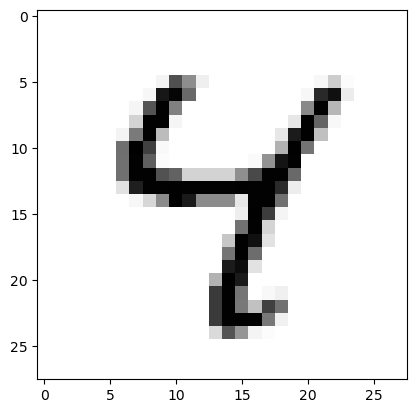

In [34]:
test_data = open("mnist_dataset/mnist_test.csv", "r")
test_data_list = test_data.readlines()
test_data.close()

all_values = test_data_list[6].split(',')
image_values = np.array([float(x) for x in all_values[1:]]).reshape((28, 28))
plt.imshow(image_values, cmap = 'Greys', interpolation = 'None')

n.query((np.array([float(x) for x in all_values[1:]]) / 255.0 * 0.99) + 0.01)

In [41]:
# test the neural network
# go through all records in the training data set

scorecard = []


for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    print(correct_label, "correct label")
    inputs_values = np.array([float(x) for x in all_values[1:]]) / 255.0 * 0.99 + 0.01
    outputs = n.query(inputs_values)
    label = np.argmax(outputs)
    print(label, "network's answer")
    if(label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)

print("performance = ", sum(scorecard)/len(scorecard))

7 correct label
7 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
0 correct label
0 ne